## Исследование объявлений о продаже квартир в регионе Спб
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
#### В данном исследовании представлена таблица с объявлениями о продаже квартир в Спб и соседних населенных пунктах.

##### В таблице перечислены площадь квартиры, число комнат, этаж, даты публикации, цены и тд.

#### Часть 1. Изучение общей информации:
1. <a href='#1'>Загрузка библиотек, изучение файла с данными, получение общей информации о датафрейме.</a>
2. <a href='#2'>Нахождение и ликвидация пропусков.</a>

Обработка пропусков во всех столбцах, кроме 'locality_name'.
3. <a href='#3'>Замена формата данных.</a>

Замена формата числовых полей данных с float на int.
Перевод даты в стандартный читаемый вид

#### Часть 2. Расчет показателей и исследование данных:
1. <a href='#4'>Категоризация этажа квартиры, даты размещения объявлений и расчет цены за квадратный метр</a>

Добавление новых столбцов даты объявления: год, месяц, день недели. Расчет средней цены за кв.м. по региону. Расчет отношения жилой и кухонной площади к общей 
2. <a href='#5'>Исследовательский анализ параметров</a>

Анализ распределений по характеристикам квартиры: общая площадь, высота потолков, число комнат, количество дней объявления до продажи и разным срезам данных.

Нахождение корреляции между ценой и другими характеристиками.
Промежуточные выводы по срезам данных.
3. <a href='#6'>Общие выводы по исследованию</a>

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id='1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.express as px


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #делаем разделитель
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
data.columns #посмотрим на корректность названий всех столбцов таблицы

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.describe() #посмотрим корректность числовых значений

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Краткий вывод

1. Размер таблицы 23 699 строк х 22 столбцов = 521 378 записей

2. В таблице представлены 4 формата данных: Int, Float, Object, Bool

3. Каких-то чересчур огромных или странных\отрицательных цифр не обнаружено в числовых столбцах

4. Названия столбцов без пробелов, кроме столбца - "cityCenters_nearest" - изменим его имя в след-м шаге на "city_centers_nearest"

5. Обращаем внимание, что во многих столбцах есть большая доля пропущенных значений (от 8 до 66%) 

### Шаг 2. Предобработка данных <a id='2'></a>

In [7]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})
#переименуем столбец, чтобы все было в нижнем регистре

In [8]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [9]:
data.isna().sum() #смотрим кол-во пустых значений по каждому столбцу

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data['balcony'] = data['balcony'].fillna(0) 
#заменяем все пропущенные значения в столбце число балконов на 0, 
#т.к. по всей видимости если пропущено значения, то балкона нет

In [11]:
data.duplicated().sum()
# дубликатов в таблице нет

0

In [12]:
data.groupby('rooms').agg({'last_price' : 'count'})
# сгруппируем в новом столбце "group_rooms" нашу таблицу в зависимости от кол-ва комнат

,last_price
rooms,
0,197
1,8047
2,7940
3,5814
4,1180
5,326
6,105
7,59
8,12


In [13]:
def room_number(number):
    if number == 0:
        return 'studio'
    if number == 1:
        return '1_room'
    if number == 2:
        return '2_rooms'
    if number == 3:
        return '3_rooms'
    if number == 4:
        return '4_rooms'
    else:
        return 'more_4_rooms'
    
data['group_rooms'] = data['rooms'].apply(room_number)
data.sample(3)

# ф-я группировки квартир по числу комнат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_rooms
7037,12,3850000.0,38.0,2018-02-01T00:00:00,1,2.5,9.0,18.0,3,NaN,...,0.0,Санкт-Петербург,47754.0,15735.0,0.0,NaN,0.0,NaN,437.0,1_room
1891,12,4390000.0,44.0,2018-09-20T00:00:00,2,2.5,5.0,28.0,5,NaN,...,1.0,Санкт-Петербург,11053.0,11382.0,1.0,981.0,1.0,941.0,156.0,2_rooms
22667,12,9300000.0,112.2,2018-09-11T00:00:00,3,3.2,5.0,84.5,5,NaN,...,0.0,Санкт-Петербург,24085.0,4653.0,2.0,476.0,0.0,NaN,6.0,3_rooms


In [14]:
data['ceiling_height'].unique()
#посмотрим уникальные значения высот потолка по таблице
# видим очень большие значения > 10м, а также 100м

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Text(0, 0.5, 'Кол-во наблюдений')

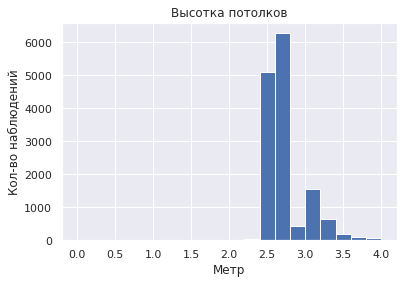

In [15]:
data['ceiling_height'].plot.hist(grid=True, bins=20, range=(0, 4))
plt.title('Высотка потолков')
plt.xlabel('Метр')
plt.ylabel('Кол-во наблюдений')
                             
                             
#начнем по порядку обрабатывать столбцы, смотрим гистограмму распределения высоты потолка
# в диапазоне [0м;4м]

Text(0, 0.5, 'Кол-во наблюдений')

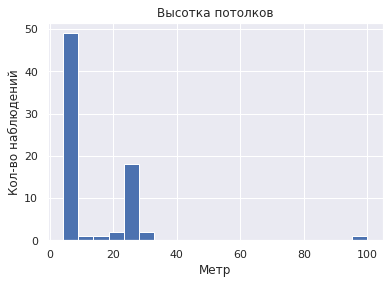

In [16]:
data['ceiling_height'].hist(bins=20,range=(4.1,100))
plt.title('Высотка потолков')
plt.xlabel('Метр')
plt.ylabel('Кол-во наблюдений')
                         
#смотрим гистограмму по высоте потолка от 4м до 100м - обнаруживаем всплеск после 20м
# скорее всего это значения в 10 раз меньше, и люди не ставили запятую, 
# т.е. эти значения можно делить на 10 и будут стандартные значения до 3м

In [17]:
data.query('ceiling_height > 19')['ceiling_height'].unique()
# смотрим сколько таких уникальных значений

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  20. ,  22.6,  27.5, 100. ])

In [18]:
data.loc[data['ceiling_height'] > 19, 'ceiling_height'] \
= data.loc[data['ceiling_height'] > 19, 'ceiling_height'] / 10

# заменим эти значения > 19 на знаения в 10 раз меньше

In [19]:
data['ceiling_height'].mean() #считаем среднюю высоту

2.7296076944291228

In [20]:
data['ceiling_height'].median() #считаем медианную высоту

2.65

Text(0, 0.5, 'Кол-во наблюдений')

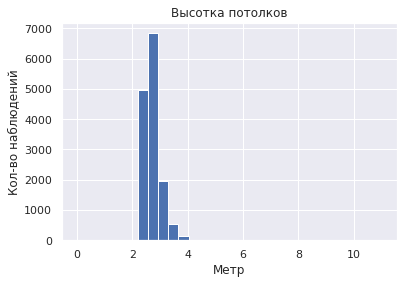

In [21]:
data['ceiling_height'].hist(bins=30,range=(0,11)) 

plt.title('Высотка потолков')
plt.xlabel('Метр')
plt.ylabel('Кол-во наблюдений')
                         
# гистограмма распределения высот выглядит вполне логично, львиная доля расположена от 2м до 4м 

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
# число пропущенных значений в столбце "ceiling_height" порядка 39% - очень много,
# заменим их лучше на среднее значение по выборке

Text(0, 0.5, 'Кол-во наблюдений')

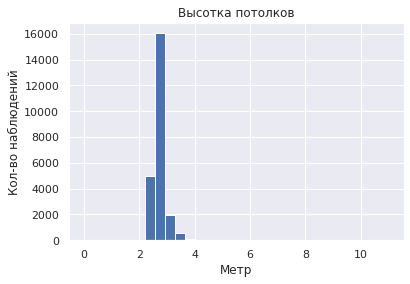

In [23]:
data['ceiling_height'].hist(bins=30,range=(0,11))

plt.title('Высотка потолков')
plt.xlabel('Метр')
plt.ylabel('Кол-во наблюдений')
                         
# смотрим как изменилась гистограмма после замены - стал сильнее заметен пик,
#но все в пределах разумного

Text(0, 0.5, 'Количество наблюдений')

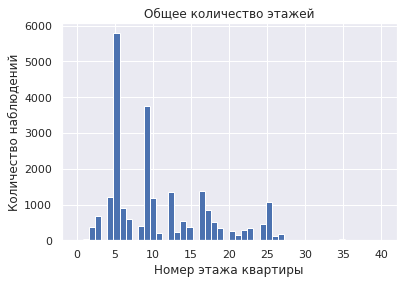

In [24]:
data['floors_total'].hist(bins=50, range=(0, 40))

plt.title('Общее количество этажей')
plt.xlabel('Номер этажа квартиры')
plt.ylabel('Количество наблюдений')
                         
# смотрим распределение колва этажей в доме - гистограмма выглядит правдива
# самые популярная этажность 5 этажей и 9 этажей

In [25]:
data['floors_total'].value_counts().head()
# сверяем числовые данные с гистограммой

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

In [26]:
data['floors_total'].mean()

10.67382374115953

In [27]:
data['floors_total'].median()

9.0

In [28]:
#data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
# заменим все пустые значения на медианное (их очень мало - всего 0,36% от общей выборки)

In [29]:
median_floors_total = data.groupby('locality_name', as_index=False).agg({'floors_total': 'median'})\
.rename(columns={'floors_total':'median_floor'})
median_floors_total.head()
# группируем по населенному пунтку и смотрим медиану этажности

,locality_name,median_floor
0,Бокситогорск,5.0
1,Волосово,5.0
2,Волхов,5.0
3,Всеволожск,9.0
4,Выборг,5.0


In [30]:
locality_name_qty = data[data['floors_total'].isna()]['locality_name'].value_counts()
locality_name_qty = pd.Series(locality_name_qty)
locality_name_qty_frame = locality_name_qty.to_frame()
locality_name_qty_frame.columns=['count']
locality_name_qty_frame['locality_name'] = locality_name_qty_frame.index
locality_name_qty_frame

# смотрим по каким населенным пунткам у нас есть пропуски и сколько таких записей
# создаем датафрейм для мёрджа

,count,locality_name
Санкт-Петербург,70,Санкт-Петербург
Красное Село,2,Красное Село
поселок Мурино,2,поселок Мурино
Кудрово,2,Кудрово
посёлок Мурино,2,посёлок Мурино
деревня Новое Девяткино,1,деревня Новое Девяткино
посёлок Щеглово,1,посёлок Щеглово
поселок городского типа Токсово,1,поселок городского типа Токсово
посёлок Стрельна,1,посёлок Стрельна
посёлок Шушары,1,посёлок Шушары


In [31]:
locality_name_qty_frame_median = locality_name_qty_frame.merge(median_floors_total,\
                                                               on='locality_name', how='left')
locality_name_qty_frame_median

# мёрджим оба датафрейма и смотрим медиланные высоты по пунктам
# в пригородах спб медиана значительно выше, но таких записей по 1-2 шт

,count,locality_name,median_floor
0,70,Санкт-Петербург,9.0
1,2,Красное Село,6.0
2,2,поселок Мурино,20.0
3,2,Кудрово,18.0
4,2,посёлок Мурино,19.0
5,1,деревня Новое Девяткино,16.0
6,1,посёлок Щеглово,4.0
7,1,поселок городского типа Токсово,6.0
8,1,посёлок Стрельна,5.0
9,1,посёлок Шушары,9.0


In [32]:
def type_locality(row):
        if 'Санкт-Петербург' == row:
            return 9
        if 'поселок Мурино' == row:
            return 10
        if 'Красное Село' == row:
            return 6
        if 'Кудрово' == row:
            return 18
        if 'посёлок Мурино' == row:
            return 19
        if 'деревня Новое Девяткино' == row:
            return 16
        if 'посёлок Стрельна' == row:
            return 5
        if 'посёлок Щеглово' == row:
            return 4
        if 'городской посёлок Новоселье' == row:
            return 12
        if 'поселок городского типа Токсово'  == row:
            return 6
        if 'посёлок Бугры' == row:
            return 14
        if 'посёлок Шушары' == row:
            return 9
        
data['median_local_floor'] = data['locality_name'].apply(type_locality)    
        
# делаем функцию для категоризации медиан по населенным пунткам, как легче сделать не знаю      
        
        

In [33]:
data['floors_total'] = data['floors_total'].fillna(data['median_local_floor'])
# заполянем пустые значения медианой каждого населенного пункта

In [34]:
data[data['floors_total'].isna()] # находим 1 пустое значение, где не проставлен населенный пукнт

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_rooms,median_local_floor
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,2.729608,NaN,68.1,4,NaN,...,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0,3_rooms,NaN


In [35]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
# заменим оставшееся значения общей медианой

In [36]:
data.isna().sum() # теперь все заполнено

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
group_rooms                 0
median_local_floor       6319
dtype: int64

In [37]:
# приступаем к следующему столбцу - "living_area"

data['rate_total_living_area'] = data['total_area'] / data['living_area']

# посчитаем в новом столбце коэфф-т отношения общего метража к жилой площади квартир

In [38]:
data.groupby('group_rooms', as_index=False).agg({'rate_total_living_area' : ['mean', 'count']})
# построим сводную таблицу по среднему коэфф-ту в зависимости от кол-ва комнат

group_rooms rate_total_living_area      
                                  mean count
0        1_room               2.127979  7388
1       2_rooms               1.771653  7296
2       3_rooms               1.644756  5366
3       4_rooms               1.593534  1089
4  more_4_rooms               1.590231   474
5        studio               1.548003   183

In [39]:
data[data['living_area'].isna()]['rooms'].unique()
# посмотрим какие уникальные кол-ва комнат у нас в столбце с пустыми значениями жилой площади

array([3, 2, 1, 4, 7, 0, 5, 6, 9])

In [40]:
def rate_rooms(number):
    if number == 3:
        return 1.644756
    if number == 2:
        return 1.771653
    if number == 1:
        return 2.127979
    if number == 4:
        return 1.593534
    if number == 0:
        return 1.548003
    if number > 4:
        return 1.590231
    
    
data['rate_total_living_area_NaN'] = data['rooms'].apply(rate_rooms)
data.head()

# создадим функцию с условиями кол-ва комнат и к каждому варианту в новый столбец
# вернем соответствущий средний коэфф-т

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_rooms,median_local_floor,rate_total_living_area,rate_total_living_area_NaN
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,3_rooms,9.0,2.117647,1.644756
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.729608,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,1_room,9.0,2.172043,2.127979
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.729608,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,2_rooms,9.0,1.632653,1.771653
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.729608,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,3_rooms,9.0,NaN,1.644756
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,2_rooms,9.0,3.125000,1.771653


In [41]:
data['living_area'] = data['living_area'].\
fillna(data['total_area'] / data['rate_total_living_area_NaN'])

# заменим пустые значения "living_area" на формуту (total_area / соот-й средний коэфф-т)

In [42]:
data.isna().sum() # проверим остались ли пустые значения в столбце living_area

total_images                      0
last_price                        0
total_area                        0
first_day_exposition              0
rooms                             0
ceiling_height                    0
floors_total                      0
living_area                       0
floor                             0
is_apartment                  20924
studio                            0
open_plan                         0
kitchen_area                   2278
balcony                           0
locality_name                    49
airports_nearest               5542
city_centers_nearest           5519
parks_around3000               5518
parks_nearest                 15620
ponds_around3000               5518
ponds_nearest                 14589
days_exposition                3181
group_rooms                       0
median_local_floor             6319
rate_total_living_area         1903
rate_total_living_area_NaN        0
dtype: int64

In [43]:
# по аналогии сделаем все те же операции и для столбца "kitchen_area"

data['rate_total_kitchen_area'] = data['total_area'] / data['kitchen_area']


In [44]:
data.groupby('group_rooms', as_index=False).agg({'rate_total_kitchen_area' : ['mean', 'count']})


group_rooms rate_total_kitchen_area      
                                   mean count
0        1_room                4.207585  7213
1       2_rooms                6.155707  7286
2       3_rooms                7.735896  5380
3       4_rooms                8.956954  1081
4  more_4_rooms               10.594739   461
5        studio                     NaN     0

In [45]:
data[data['kitchen_area'].isna()]['rooms'].unique()


array([3, 1, 2, 0, 4, 7, 5, 6, 8, 9])

In [46]:
def rate_rooms_kitchen(number):
    if number == 3:
        return 7.735896
    if number == 1:
        return 4.207585
    if number == 2:
        return 6.155707
    if number == 0:
        return 4.207585 # заменим по среднему коэфф-ту 1 комнаты, хотя по логике он наверно должень быть чуть меньше
    if number == 4:
        return 8.956954
    if number > 4:
        return 10.594739
    
    
data['rate_total_kitchen_area_NaN'] = data['rooms'].apply(rate_rooms_kitchen)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group_rooms,median_local_floor,rate_total_living_area,rate_total_living_area_NaN,rate_total_kitchen_area,rate_total_kitchen_area_NaN
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,NaN,...,482.0,2.0,755.0,NaN,3_rooms,9.0,2.117647,1.644756,4.320000,7.735896
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.729608,11.0,18.600000,1,NaN,...,NaN,0.0,NaN,81.0,1_room,9.0,2.172043,2.127979,3.672727,4.207585
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.729608,5.0,34.300000,4,NaN,...,90.0,2.0,574.0,558.0,2_rooms,9.0,1.632653,1.771653,6.746988,6.155707
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.729608,14.0,96.670874,9,NaN,...,84.0,3.0,234.0,424.0,3_rooms,9.0,NaN,1.644756,NaN,7.735896
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,NaN,...,112.0,1.0,48.0,121.0,2_rooms,9.0,3.125000,1.771653,2.439024,6.155707


In [47]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / data['rate_total_kitchen_area_NaN'])


In [48]:
data.isna().sum() # проверяем

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
living_area                        0
floor                              0
is_apartment                   20924
studio                             0
open_plan                          0
kitchen_area                       0
balcony                            0
locality_name                     49
airports_nearest                5542
city_centers_nearest            5519
parks_around3000                5518
parks_nearest                  15620
ponds_around3000                5518
ponds_nearest                  14589
days_exposition                 3181
group_rooms                        0
median_local_floor              6319
rate_total_living_area          1903
rate_total_living_area_NaN         0
rate_total_kitchen_area         2278
r

In [49]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# заменим пустые значения в столбце "is_apartment" на отрицательное значение,
# т.к. скорее всего люди по умолчанию не ставят ничего если это не апартаменты

In [50]:
data['is_apartment'].unique() # проверка уникальных значений по столбцу, все ок

array([False,  True])

In [51]:
data['days_exposition'].value_counts().head()
# ТОП-5 самых распространенных дней размещенияобъявления

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
Name: days_exposition, dtype: int64

In [52]:
data.groupby('group_rooms').agg({'days_exposition' : 'mean'})\
.rename(columns={'days_exposition' : "mean_days_exposition"})\
.sort_values(by='mean_days_exposition')


# сводная по среднему числу дней объявления в зависимости от числа комнат

,mean_days_exposition
group_rooms,
studio,109.180328
1_room,158.909391
2_rooms,173.223058
3_rooms,204.232828
4_rooms,254.273114
more_4_rooms,295.077121


In [53]:
def days_advert(number):
    if number == 0:
        return 109.180328
    if number == 1:
        return 158.909391
    if number == 2:
        return 173.223058
    if number == 3:
        return 204.232828
    if number == 4:
        return 254.273114
    if number > 4:
        return 295.077121
    
data['days_advert'] = data['rooms'].apply(days_advert)
data.head()
#ф-я по градации дней

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,group_rooms,median_local_floor,rate_total_living_area,rate_total_living_area_NaN,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,...,2.0,755.0,NaN,3_rooms,9.0,2.117647,1.644756,4.320000,7.735896,204.232828
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.729608,11.0,18.600000,1,False,...,0.0,NaN,81.0,1_room,9.0,2.172043,2.127979,3.672727,4.207585,158.909391
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.729608,5.0,34.300000,4,False,...,2.0,574.0,558.0,2_rooms,9.0,1.632653,1.771653,6.746988,6.155707,173.223058
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.729608,14.0,96.670874,9,False,...,3.0,234.0,424.0,3_rooms,9.0,NaN,1.644756,NaN,7.735896,204.232828
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,False,...,1.0,48.0,121.0,2_rooms,9.0,3.125000,1.771653,2.439024,6.155707,173.223058


Text(0, 0.5, 'Количество наблюдений')

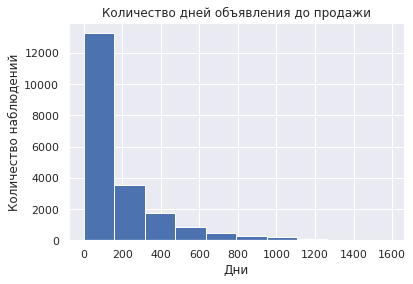

In [54]:
data['days_exposition'].hist()

plt.title('Количество дней объявления до продажи')
plt.xlabel('Дни')
plt.ylabel('Количество наблюдений')

#### Вывод

По графику видно, что бОльшая часть (~ 70 %) квартир продается за период до 200 дней

In [55]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_advert'])

Text(0, 0.5, 'Количество наблюдений')

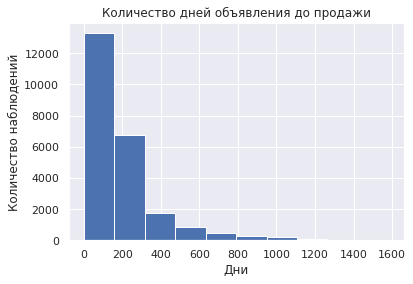

In [56]:
data['days_exposition'].hist()

plt.title('Количество дней объявления до продажи')
plt.xlabel('Дни')
plt.ylabel('Количество наблюдений')

#### Вывод

После замены пустых значений на медианы соответствующие значениям числу комнат график исказился в сторону медианных значений

In [57]:
data.isna().sum()

total_images                       0
last_price                         0
total_area                         0
first_day_exposition               0
rooms                              0
ceiling_height                     0
floors_total                       0
living_area                        0
floor                              0
is_apartment                       0
studio                             0
open_plan                          0
kitchen_area                       0
balcony                            0
locality_name                     49
airports_nearest                5542
city_centers_nearest            5519
parks_around3000                5518
parks_nearest                  15620
ponds_around3000                5518
ponds_nearest                  14589
days_exposition                    0
group_rooms                        0
median_local_floor              6319
rate_total_living_area          1903
rate_total_living_area_NaN         0
rate_total_kitchen_area         2278
r

Text(0, 0.5, 'Количество наблюдений')

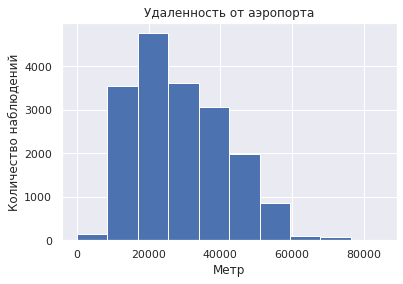

In [58]:
data['airports_nearest'].hist()

plt.title('Удаленность от аэропорта')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')
# шистограмма распределения по столбцу близость к аэропорту

#### Краткий вывод

В среднем все квартиры лежат примерно на расстоянии от 10 км до 50 км до аэропорта <br/>
Самый распространенный вариант - чуть более 20 км

In [59]:
data.groupby('locality_name' , as_index=False)\
.agg({'airports_nearest': 'median', 'last_price':'count'})\
.sort_values(by='airports_nearest', ascending=True)\
.head(50).\
rename(columns={'airports_nearest': 'median_airports_nearest', 'last_price': 'amount_adverts'})

# группировка по населенному пункту и удаленности от аэропорта по медиане
# бОльшую долю по числу квартир занимает Спб и видимо большое кол-во городов в целом без данных

,locality_name,median_airports_nearest,amount_adverts
269,посёлок Александровская,12896.5,2
32,Пушкин,15766.0,369
326,посёлок Шушары,17427.0,440
26,Павловск,20529.5,38
299,посёлок Петро-Славянка,20605.0,1
15,Красное Село,25715.5,178
288,посёлок Металлострой,25758.0,66
13,Колпино,26232.0,338
322,посёлок Усть-Ижора,26510.5,2
33,Санкт-Петербург,26757.5,15721


In [60]:
data['airports_nearest'].mean() #среднее значение до аэропорта по выборке

28793.67219254282

In [61]:
data['airports_nearest'].median()  #медианное значение до аэропорта по выборке

26726.0

In [62]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
# заменим пустые значения на медиану (доля пустых значения 23%)

Text(0, 0.5, 'Количество наблюдений')

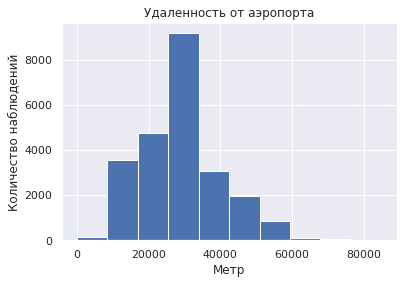

In [63]:
data['airports_nearest'].hist()

plt.title('Удаленность от аэропорта')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')

#### Краткий вывод

 После замены на медиану по всем значениями наше распределение сместилось вправо, т.е
 в нашем распределении появилось большое кол-во медианоудаленных от аэропорта городов, а именно 23%

Text(0, 0.5, 'Количество наблюдений')

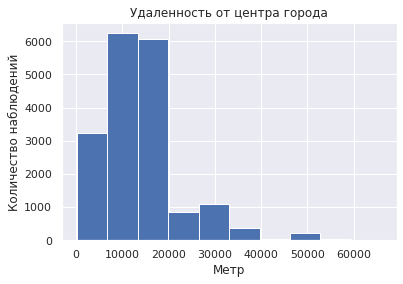

In [64]:
data['city_centers_nearest'].hist()

plt.title('Удаленность от центра города')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')
# схожая картина по распределению удаленности от центра города

In [65]:
data['city_centers_nearest'].mean()

14191.277832783278

In [66]:
data['city_centers_nearest'].median()

13098.5

In [67]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest']\
                                                                   .median())
# по аналогии заменим пустые значения на медиану (доля пустых значения 23%)

Text(0, 0.5, 'Количество наблюдений')

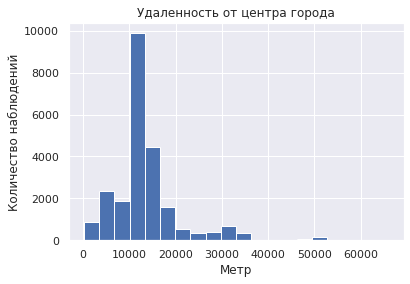

In [68]:
data['city_centers_nearest'].hist(bins=20)

plt.title('Удаленность от центра города')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')
# проверяем как изменилась гистограмма

#### Краткий вывод

 После замены на медиану по всем значениями в нашем распределении появился явный пик около медианного значения 13км удаленности от центра

In [69]:
data['parks_around3000'].unique() # уникальные значения по столбцу "parks_around3000"

array([ 1.,  0.,  2., nan,  3.])

In [70]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# заменим все пустые значения на 0, т.к. наверняка в объявлении люди бы указали
# наличие парка в радиусе 3км, если б он был

In [71]:
data['ponds_around3000'].unique()
# проделаем ту же операцию по столбцу "ponds_around3000" - заменим пустые значения на 0

array([ 2.,  0.,  3.,  1., nan])

In [72]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# аналогично заменим на 0 наличие прудов

Text(0, 0.5, 'Количество наблюдений')

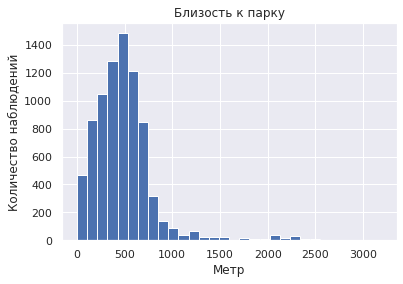

In [73]:
data['parks_nearest'].hist(bins=30)

plt.title('Близость к парку')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')

# посмотрим гистограмму распределения удаленности парков

#### Краткий вывод

 В целом можно с уверенность говорить, что почти все квартиры в регионе Спб нах-ся в пошаговой близости к парковой зоне. Чаще всего парк нах-ся в 500 м от дома

In [74]:
data['parks_nearest'].mean()

490.80455501918556

In [75]:
data['parks_nearest'].median()

455.0

In [76]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

Text(0, 0.5, 'Количество наблюдений')

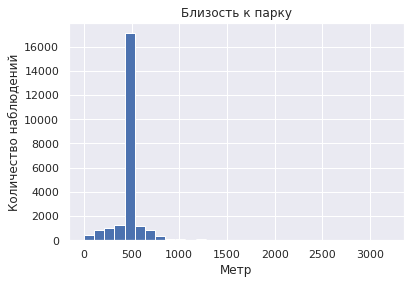

In [77]:
data['parks_nearest'].hist(bins=30)

plt.title('Близость к парку')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')

# изменение графика после замены, замечаем достаточно сильное искажение картины

#### Краткий вывод

 После наших преобразований появился ярко выраженный пик в медианном значении выборки ~ 450м

Text(0, 0.5, 'Количество наблюдений')

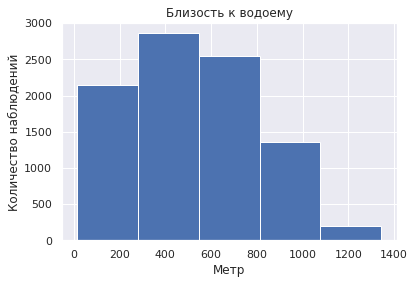

In [78]:
data['ponds_nearest'].hist(bins=5)

plt.title('Близость к водоему')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')

#### Краткий вывод

 Все дома в регионе Спб нах-ся по близости к водоемам, что неудивительно.
 Чаще всего пруд нах-ся в районе 400-500м

In [79]:
data['ponds_nearest'].mean()

517.9809001097694

In [80]:
data['ponds_nearest'].median()

502.0

In [81]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

Text(0, 0.5, 'Количество наблюдений')

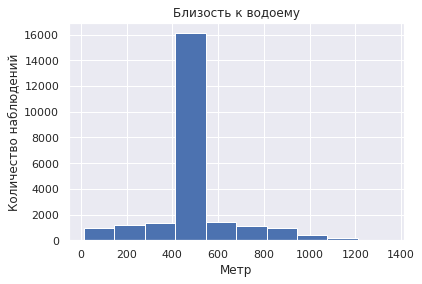

In [82]:
data['ponds_nearest'].hist()

plt.title('Близость к водоему')
plt.xlabel('Метр')
plt.ylabel('Количество наблюдений')
# изменение гистограммы - замечаем достаточно сильное искажение картины

#### Краткий вывод

 После наших преобразований появился ярко выраженный пик в медианном значении выборки ~ 500м

In [83]:
data['locality_name'].value_counts()
#в данном столбце заменить пустые значения обычным способом способом невозможно - оставим как есть

Санкт-Петербург                     15721
посёлок Мурино                        522
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Усть-Луга                       1
деревня Реброво                         1
деревня Куровицы                        1
садовое товарищество Новая Ропша        1
деревня Большое Рейзино                 1
Name: locality_name, Length: 364, dtype: int64

### Замена формата данных <a id='3'></a>

In [84]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

# заменяем типы данных в столбцах на Int, т.к. float для них излишен и не так информативен

In [85]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
# заменяем формат даты на более читаемый без часов\мин\сек

In [86]:
data['ceiling_height'] = data['ceiling_height'].round(1)
# округлим значения высоты потолка до 1 знака после запятой

In [87]:
data.head() # проверяем все наши исправления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,group_rooms,median_local_floor,rate_total_living_area,rate_total_living_area_NaN,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,2,755,204,3_rooms,9.0,2.117647,1.644756,4.320000,7.735896,204.232828
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.600000,1,False,...,0,502,81,1_room,9.0,2.172043,2.127979,3.672727,4.207585,158.909391
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.300000,4,False,...,2,574,558,2_rooms,9.0,1.632653,1.771653,6.746988,6.155707,173.223058
3,0,64900000,159.0,2015-07-24,3,2.7,14,96.670874,9,False,...,3,234,424,3_rooms,9.0,NaN,1.644756,NaN,7.735896,204.232828
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,1,48,121,2_rooms,9.0,3.125000,1.771653,2.439024,6.155707,173.223058


#### Краткий вывод

1. Наблюдается большой объем пропущенных значений, по всей видимости при размещении объявления люди не считают многие факторы\описания значимыми при продаже квартиры. Проблема носит не технический характер


2. Многие форматы столбцов данных можно заменить на этапе сбора данных, это поможет сэкономить объем хранения данных и время на их обработку (last_price, floors_total, ponds_around3000 и тд)


3. Отмечаем, что по данным дней размещения объявления самые быстро продаваемые - это студии и 1-комнатные

4. Самые распространенные предложения квартиры - это 1 и 2-комнатные

### Шаг 3. Посчитайте и добавьте в таблицу <a id='4'></a>

In [88]:
def type_floor(x, y):
    if x == y:
        return 'last_floor'
    if x == 1:
        return '1st_floor'
    else:
        return 'other_floor'

data['floor_level'] = data.apply(lambda x: type_floor(x['floor'], x['floors_total']), axis=1)
data['floor_level'].unique()

# функция по определению градации этажа квартиры
# выведем уникальные значения дял проверки

array(['other_floor', '1st_floor', 'last_floor'], dtype=object)

In [89]:
data['floor_level'].value_counts()
# выведем градацию популярности

other_floor    17441
last_floor      3366
1st_floor       2892
Name: floor_level, dtype: int64

In [90]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,group_rooms,median_local_floor,rate_total_living_area,rate_total_living_area_NaN,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert,floor_level
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,755,204,3_rooms,9.0,2.117647,1.644756,4.320000,7.735896,204.232828,other_floor
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.600000,1,False,...,502,81,1_room,9.0,2.172043,2.127979,3.672727,4.207585,158.909391,1st_floor
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.300000,4,False,...,574,558,2_rooms,9.0,1.632653,1.771653,6.746988,6.155707,173.223058,other_floor
3,0,64900000,159.0,2015-07-24,3,2.7,14,96.670874,9,False,...,234,424,3_rooms,9.0,NaN,1.644756,NaN,7.735896,204.232828,other_floor
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,48,121,2_rooms,9.0,3.125000,1.771653,2.439024,6.155707,173.223058,other_floor


In [91]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].round(0)
# считаем цену квадратного метра

In [92]:
data['living_total_rate'] = data['living_area'] / data['total_area']
data['living_total_rate'] = data['living_total_rate'].round(2)
# коэффициент отношения жилой площади к общей

In [93]:
data['kitchen_total_rate'] = data['kitchen_area'] / data['total_area']
data['kitchen_total_rate'] = data['kitchen_total_rate'].round(2)
# коэффициент отношения кухонной площади к общей

In [94]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'living_total_rate', 
             'kitchen_total_rate', 'price_square_meter']].head(2)

,total_area,living_area,kitchen_area,living_total_rate,kitchen_total_rate,price_square_meter
0,108.0,51.0,25.0,0.47,0.23,120370.0
1,40.4,18.6,11.0,0.46,0.27,82921.0


In [95]:
data['price_square_meter'].mean()

99421.65509093211

In [96]:
data['living_total_rate'].mean()

0.5632672264652516

In [97]:
data['kitchen_total_rate'].mean()

0.18723996793113631

In [98]:
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()
# выведем в отдельных столбцах год, месяц, день размещения объявления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert,floor_level,price_square_meter,living_total_rate,kitchen_total_rate,year,month,weekday
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,4.320000,7.735896,204.232828,other_floor,120370.0,0.47,0.23,2019,3,3
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.600000,1,False,...,3.672727,4.207585,158.909391,1st_floor,82921.0,0.46,0.27,2018,12,1
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.300000,4,False,...,6.746988,6.155707,173.223058,other_floor,92786.0,0.61,0.15,2015,8,3
3,0,64900000,159.0,2015-07-24,3,2.7,14,96.670874,9,False,...,NaN,7.735896,204.232828,other_floor,408176.0,0.61,0.13,2015,7,4
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,2.439024,6.155707,173.223058,other_floor,100000.0,0.32,0.41,2018,6,1


In [99]:
data['year'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year, dtype: int64

In [100]:
data['month'].value_counts()

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64

#### Краткий вывод

1. Средняя цена за квадратный метр по региону = 99 422 руб


2. Увеличивается число желающих продать свои квартиры, начиная с 2014 года.


3. Самое популярное время для решения продать квартиру - конец зимы-начало весны и конец осени


4. В среднем жилая площадь составляет около 56% от общей площади квартиры, кухня - 19%


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a id='5'></a>

In [101]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert,floor_level,price_square_meter,living_total_rate,kitchen_total_rate,year,month,weekday
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,4.320000,7.735896,204.232828,other_floor,120370.0,0.47,0.23,2019,3,3
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.600000,1,False,...,3.672727,4.207585,158.909391,1st_floor,82921.0,0.46,0.27,2018,12,1
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.300000,4,False,...,6.746988,6.155707,173.223058,other_floor,92786.0,0.61,0.15,2015,8,3
3,0,64900000,159.0,2015-07-24,3,2.7,14,96.670874,9,False,...,NaN,7.735896,204.232828,other_floor,408176.0,0.61,0.13,2015,7,4
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,2.439024,6.155707,173.223058,other_floor,100000.0,0.32,0.41,2018,6,1


Text(0, 0.5, 'Количество наблюдений')

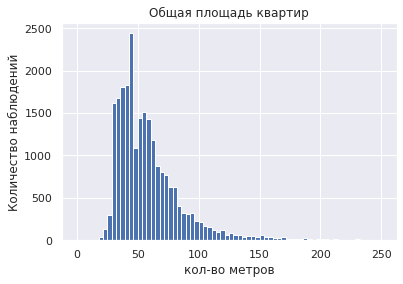

In [102]:
data['total_area'].hist(bins=70,range=(0,250))

plt.title('Общая площадь квартир')
plt.xlabel('кол-во метров')
plt.ylabel('Количество наблюдений')

# гистограмма распределения общей площади квартиры

#### Краткий вывод
 Львиная доля квартир имеет площадь от 25 до 100 кв.м. Самый распространенный вариант ~ 48 кв.м.
 Площадь свыше 200 кв.м. можем считать выбросами

In [103]:
data['last_price'].median()
# медианное значение цены продажи квартиры по выборке

4650000.0

In [104]:
data['last_price'].mean()


6541548.771551542

Text(0, 0.5, 'Количество наблюдений')

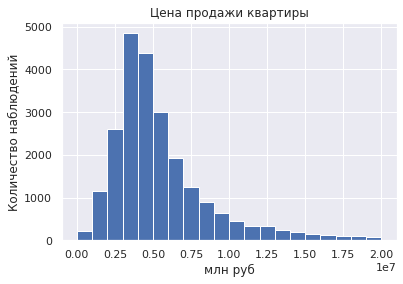

In [105]:
data['last_price'].hist(bins=20, range=(0, 20000000))

plt.title('Цена продажи квартиры')
plt.xlabel('млн руб')
plt.ylabel('Количество наблюдений')
# гистограмма распределения цен квартир, диапазион до 10 млн руб

In [106]:
data['last_price'].quantile(0.95)

15300000.0

#### Краткий вывод
 В среднем бОльшая часть квартир лежит в диапазоне от 2.5 до 7.5. млн руб.<br/>
 Самый распространенная цена продажи ~ 4,5 млн руб <br/>
 Цену продажи свыше 20млн можем считать выбросами

Text(0, 0.5, 'Количество наблюдений')

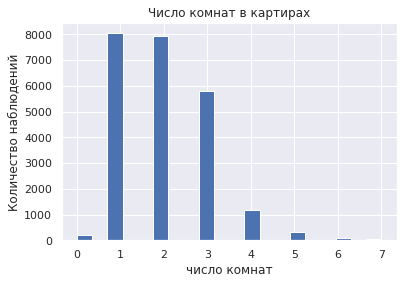

In [107]:
data['rooms'].hist(bins=20, range=(0,7))

plt.title('Число комнат в картирах')
plt.xlabel('число комнат')
plt.ylabel('Количество наблюдений')
# диаграмма распределения числа комнат

In [108]:
data['rooms'].quantile(0.95)

4.0

#### Краткий вывод
 Самые распространенные квартиры при продаже: 1 и 2-комнатные <br/>
 Квартиры с > 5 комнатами считаем выбросами

Text(0, 0.5, 'Количество наблюдений')

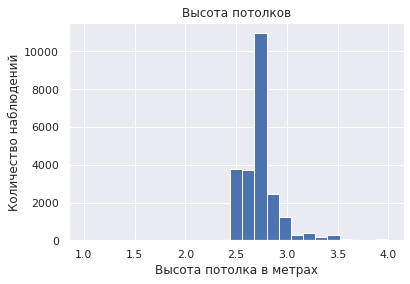

In [109]:
data['ceiling_height'].hist(bins=25, range=(1,4))

plt.title('Высота потолков')
plt.xlabel('Высота потолка в метрах')
plt.ylabel('Количество наблюдений')
# диаграмма распределения высот потолка

In [110]:
data['ceiling_height'].quantile(0.95)

3.1

#### Краткий вывод
 Почти все квартиры имеют высоту потолков от 2.5 до 3.0м <br/>
 Квартиры с потолками выше 3.5м будем считать выбросами

Text(0, 0.5, 'Количество наблюдений')

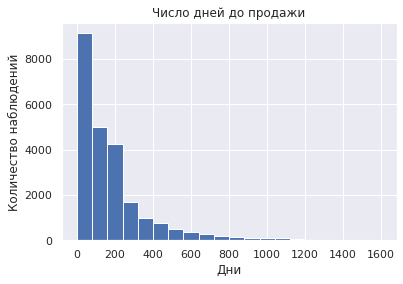

In [111]:
data['days_exposition'].hist(bins=20, range=(1,1600))

plt.title('Число дней до продажи')
plt.xlabel('Дни')
plt.ylabel('Количество наблюдений')

# гистограмма распределения дней продаж

#### Краткий вывод
 бОльшая часть квартир продается в течение 200 дней с момента публикации объявления о продаже. Будем считать выбросами квартиры со сроком продажи свыше 600 дней

In [112]:
data['days_exposition'].mean() # среднее число дней до продажи

182.10000421958733

In [113]:
data['days_exposition'].median() # медианное число дней до продажи

124.0

In [114]:
data['days_exposition'].mode() # мода (самое распространенное) числа дней до продажи

0    173
dtype: int64

In [115]:
data['days_exposition'].quantile(0.25) 
# число <= 45 дням можно считать очень быстрой продажей

45.0

In [116]:
data['days_exposition'].quantile(0.75)
# число >= 213 дням можно считать очень долгой продажей

213.0

In [117]:
data['days_exposition'].quantile(0.95)


603.0

In [118]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'group_rooms', 'median_local_floor',
       'rate_total_living_area', 'rate_total_living_area_NaN',
       'rate_total_kitchen_area', 'rate_total_kitchen_area_NaN', 'days_advert',
       'floor_level', 'price_square_meter', 'living_total_rate',
       'kitchen_total_rate', 'year', 'month', 'weekday'],
      dtype='object')

In [119]:
data_new = data[data['total_area'] < 200]
len(data_new)
# вырезаем выбросы

23468

In [120]:
len(data)

23699

In [121]:
data_new = data_new[data_new['last_price'] < 20000000]
len(data_new) # вырезаем выбросы

22933

In [122]:
data_new = data_new[data_new['rooms'] < 5]
len(data_new) # вырезаем выбросы

22651

In [123]:
data_new = data_new[data_new['ceiling_height'] < 3.5]
len(data_new) # вырезаем выбросы

22372

In [124]:
data_new = data_new[data_new['days_exposition'] < 600]
len(data_new) # вырезаем выбросы

21296

In [125]:
data_new.head()
# новый датафрейм для анализа

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert,floor_level,price_square_meter,living_total_rate,kitchen_total_rate,year,month,weekday
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,4.320000,7.735896,204.232828,other_floor,120370.0,0.47,0.23,2019,3,3
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,False,...,3.672727,4.207585,158.909391,1st_floor,82921.0,0.46,0.27,2018,12,1
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,6.746988,6.155707,173.223058,other_floor,92786.0,0.61,0.15,2015,8,3
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,2.439024,6.155707,173.223058,other_floor,100000.0,0.32,0.41,2018,6,1
5,10,2890000,30.4,2018-09-10,1,2.7,12,14.4,5,False,...,3.340659,4.207585,158.909391,other_floor,95066.0,0.47,0.30,2018,9,0


In [126]:
df = data_new.loc[:,['last_price', 'total_area', 'rooms', 'city_centers_nearest', 
                     'floor', 'year', 'month', 'weekday']]
df.head()

,last_price,total_area,rooms,city_centers_nearest,floor,year,month,weekday
0,13000000,108.0,3,16028,8,2019,3,3
1,3350000,40.4,1,18603,1,2018,12,1
2,5196000,56.0,2,13933,4,2015,8,3
4,10000000,100.0,2,8098,13,2018,6,1
5,2890000,30.4,1,13098,5,2018,9,0


In [127]:
floor = df.groupby('floor', as_index=False)['last_price'].agg('median')\
.rename(columns={'floor': 'floor_number', 'last_price' : 'median_price'})
floor

# группируем по этажам сумму продаж

,floor_number,median_price
0,1,3800000
1,2,4250000
2,3,4350000
3,4,4400000
4,5,4200000
5,6,4850000
6,7,4800000
7,8,4715000
8,9,4600000
9,10,4900000


Text(0, 0.5, 'Медианная цена, млн руб х10')

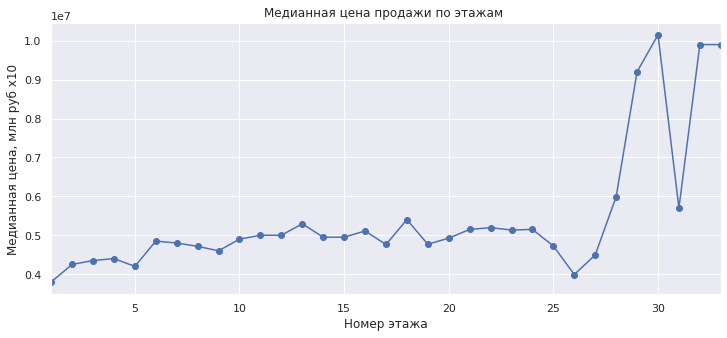

In [128]:
floor.plot(x='floor_number', y='median_price', style='o-', figsize=(12,5), legend=False)

plt.title('Медианная цена продажи по этажам ')
plt.xlabel('Номер этажа')
plt.ylabel('Медианная цена, млн руб х10')
# изображаем в динамике продажи по этажам

#### Краткий вывод

 С ростом этажности квартиры медианная цена продажи показывает небольшой и не очень стабильный рост, который после 23 этажа прекращается и цена резки идет вниз.<br/>
 Скорее всего это последние этажи в новых многоэтажных домах в новых районах Спб.<br/>
 После 27 этажа цена резко идет вверх и по всей видимости это редкие, дорогие апартаменты на последних этажах домов премиум класса

In [129]:
year = df.groupby('year', as_index=False)['last_price'].agg('median')\
.rename(columns={'year': 'year_number', 'last_price' : 'median_price'})
year
# группируем по годам сумму продаж

,year_number,median_price
0,2014,7500000
1,2015,4890000
2,2016,4350000
3,2017,4350000
4,2018,4499000
5,2019,4950000


Text(0, 0.5, 'Медианная цена, млн руб')

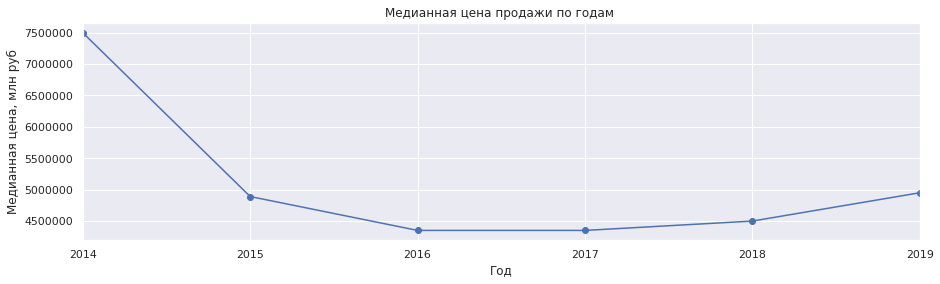

In [130]:
year.plot(x='year_number', y='median_price', style='o-', figsize=(15,4), legend=False)

plt.title('Медианная цена продажи по годам ')
plt.xlabel('Год')
plt.ylabel('Медианная цена, млн руб')

#### Краткий вывод

 После 2014 медианная цена продажи резко просела вниз и достигла своего дна к 2017 (по всей видимости из-за кризиса в экономике) <br/>
 С 2018 года наблюдаем некоторый слабый рост в цене и в 2019 цена достигает уровня 2015 года

In [131]:
month = df.groupby('month', as_index=False)['last_price'].agg('median')\
.rename(columns={'month': 'month_number', 'last_price' : 'median_price'})
month
# группируем по месяцам сумму продаж

,month_number,median_price
0,1,4500000
1,2,4500000
2,3,4500000
3,4,4690000
4,5,4400000
5,6,4240000
6,7,4450000
7,8,4499500
8,9,4500000
9,10,4485000


Text(0, 0.5, 'Медианная цена, млн руб')

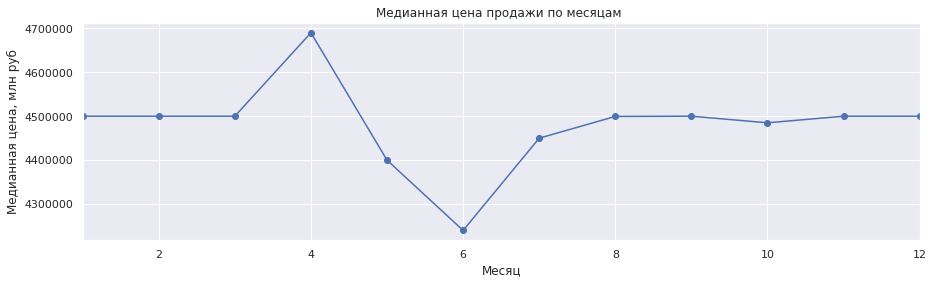

In [132]:
month.plot(x='month_number', y='median_price', style='o-', figsize=(15,4), legend=False)

plt.title('Медианная цена продажи по месяцам ')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, млн руб')

#### Краткий вывод

 По графику замечаем, что пик роста цен приходится на апрель и резкое падение цены в июне. В остальные месяцы цена стабильна и не меняется

In [133]:
day = df.groupby('weekday', as_index=False)['last_price'].agg('median')\
.rename(columns={'weekday': 'weekday_number', 'last_price' : 'median_price'})
day
# группируем по дням недели сумму продаж

,weekday_number,median_price
0,0,4500000
1,1,4550000
2,2,4500000
3,3,4499000
4,4,4450000
5,5,4450000
6,6,4450000


Text(0, 0.5, 'Медианная цена, млн руб')

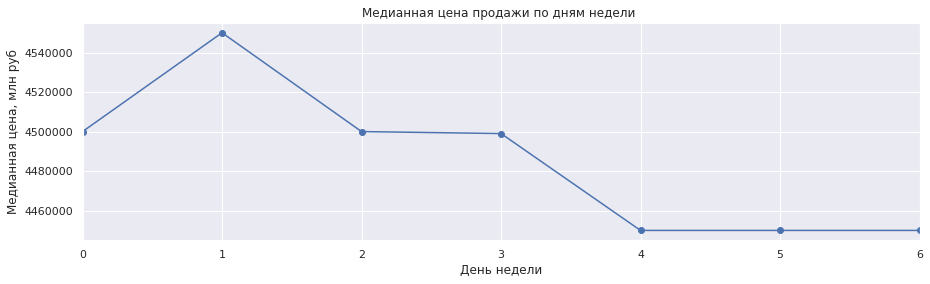

In [134]:
day.plot(x='weekday_number', y='median_price', style='o-', figsize=(15,4), legend=False)

plt.title('Медианная цена продажи по дням недели ')
plt.xlabel('День недели')
plt.ylabel('Медианная цена, млн руб')

#### Краткий вывод

 Во вторник цена максимальна, минимальная цена в пт и выходные

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc517128350>,
      dtype=object)

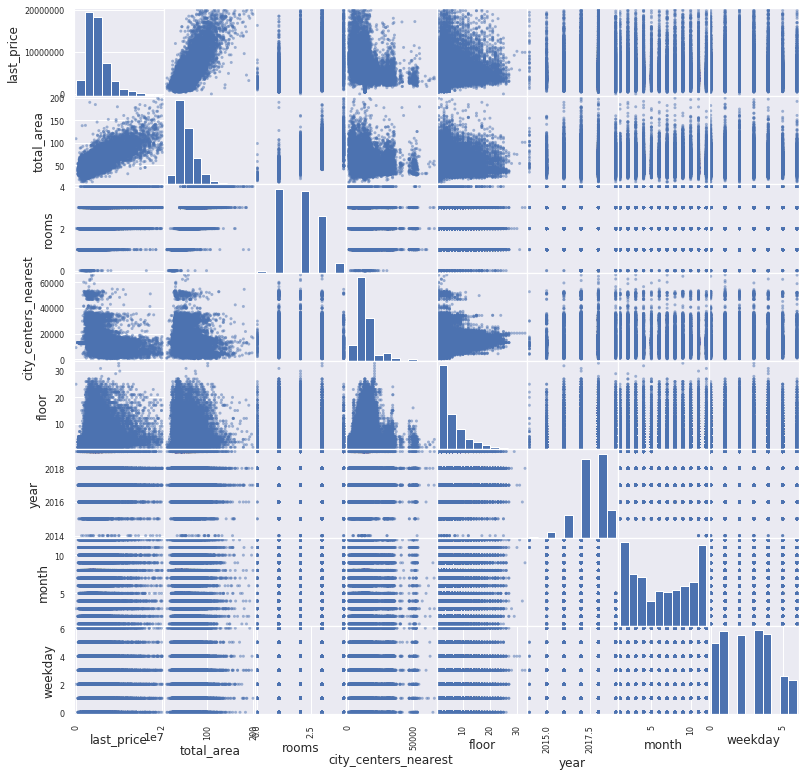

In [135]:
pd.plotting.scatter_matrix(df, figsize=(13,13))
# посторим график корреляций

In [136]:
df.corr() # таблица коэфф-тов корреляций

,last_price,total_area,rooms,city_centers_nearest,floor,year,month,weekday
last_price,1.000000,0.759601,0.459289,-0.243693,0.120571,0.005174,0.004168,-0.011809
total_area,0.759601,1.000000,0.774277,-0.130833,-0.009151,-0.049253,0.008812,-0.009578
rooms,0.459289,0.774277,1.000000,-0.079364,-0.156926,-0.024787,-0.002152,-0.002707
city_centers_nearest,-0.243693,-0.130833,-0.079364,1.000000,-0.002601,0.001154,-0.011675,0.003892
floor,0.120571,-0.009151,-0.156926,-0.002601,1.000000,-0.003112,0.017856,0.011224
year,0.005174,-0.049253,-0.024787,0.001154,-0.003112,1.000000,-0.294484,-0.009613
month,0.004168,0.008812,-0.002152,-0.011675,0.017856,-0.294484,1.000000,0.012685
weekday,-0.011809,-0.009578,-0.002707,0.003892,0.011224,-0.009613,0.012685,1.000000


#### Краткий вывод


1. Корреляция между общей площадью и ценой стало заметно сильнее, коэфф 0.76
2. Также сильнее стала корреляция между числом комнат и ценой. Коэфф = 0.46
3. Подросла корреляция между этажом и ценой. Коэфф = 0.12. На графике выше было подтверждено, что рост есть, но не такой явный и сильный.
4. Увеличилась отрицательная корреляция между ценой и удаленность от центра. Коэфф = -0.24
5. Слабая корреляция по годам осталась, несмотря на резкое падение цены с 2014 года. Это связано с очень малым количеством наблюдений в 2014 в нашей таблице
6. Между месяцами и днями недели корреляция также не обнаружена


In [137]:
df1 = data_new.groupby('locality_name').agg({'price_square_meter': 'mean'})\
.rename(columns={'price_square_meter' : 'price_square_meter_by_city'})

df1
# считаем среднюю цену за квадратный метр по каждому населенному пункту

,price_square_meter_by_city
locality_name,
Бокситогорск,17457.333333
Волосово,40613.241379
Волхов,35085.311927
Всеволожск,67069.739946
Выборг,57927.377880
...,...
село Путилово,39921.500000
село Рождествено,37733.000000
село Русско-Высоцкое,55075.375000


In [138]:
my_series = data_new['locality_name'].value_counts().head(10)
# заносим в список ТОП-10 самых популярных населенных пунктов по кол-ву объявлений

In [139]:
my_series = pd.Series(my_series)
my_series # делаем из списка пандовскую серию

Санкт-Петербург      13773
посёлок Мурино         500
посёлок Шушары         423
Всеволожск             373
Пушкин                 332
Колпино                326
посёлок Парголово      317
Гатчина                287
деревня Кудрово        276
Выборг                 217
Name: locality_name, dtype: int64

In [140]:
z = my_series.to_frame()
z.columns = ['count']
z['locality_name'] = z.index
z
# делаем из серии датафрейм со столбцом locality_name (а не индексами)

,count,locality_name
Санкт-Петербург,13773,Санкт-Петербург
посёлок Мурино,500,посёлок Мурино
посёлок Шушары,423,посёлок Шушары
Всеволожск,373,Всеволожск
Пушкин,332,Пушкин
Колпино,326,Колпино
посёлок Парголово,317,посёлок Парголово
Гатчина,287,Гатчина
деревня Кудрово,276,деревня Кудрово
Выборг,217,Выборг


In [141]:
df2 = z.merge(df1, on='locality_name', how='left')
df2
# мёрджим наши 2 датафрейма по столбцу loaclity_name только по ТОП-10 населенных пунктов

,count,locality_name,price_square_meter_by_city
0,13773,Санкт-Петербург,108589.462354
1,500,посёлок Мурино,85987.738000
2,423,посёлок Шушары,78673.040189
3,373,Всеволожск,67069.739946
4,332,Пушкин,101701.819277
5,326,Колпино,75296.334356
6,317,посёлок Парголово,90166.933754
7,287,Гатчина,69081.926829
8,276,деревня Кудрово,92706.695652
9,217,Выборг,57927.377880


In [142]:
df2.price_square_meter_by_city = df2.price_square_meter_by_city.round(0)
df2.sort_values(by='price_square_meter_by_city', ascending=False) 
# округялем цену до 2 знаков после запятой
# самый дорогая цена в Спб = 108589.0, самая дешевая в Выборге = 57927.0

,count,locality_name,price_square_meter_by_city
0,13773,Санкт-Петербург,108589.0
4,332,Пушкин,101702.0
8,276,деревня Кудрово,92707.0
6,317,посёлок Парголово,90167.0
1,500,посёлок Мурино,85988.0
2,423,посёлок Шушары,78673.0
5,326,Колпино,75296.0
7,287,Гатчина,69082.0
3,373,Всеволожск,67070.0
9,217,Выборг,57927.0


Text(0, 0.5, 'Цена за кв.м.')

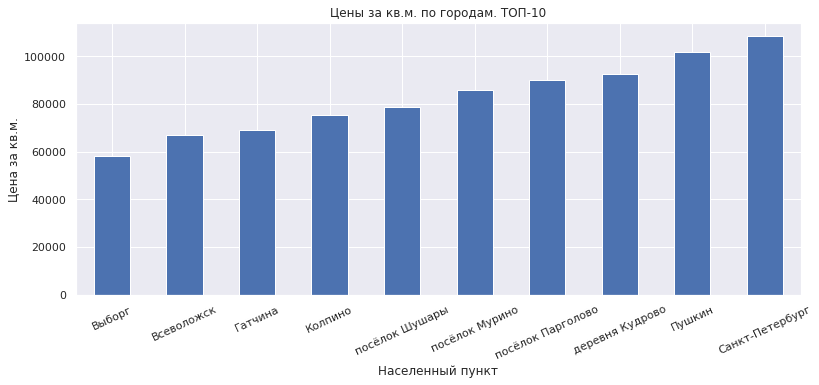

In [143]:
df2.sort_values(by='price_square_meter_by_city', ascending=True)\
.plot(kind='bar', x='locality_name', y='price_square_meter_by_city', \
      rot=25, figsize=(13,5), legend=False)

plt.title('Цены за кв.м. по городам. ТОП-10')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена за кв.м.')

# гистограмма ТОП-10 цена за кв.м. в регионе Спб по населенным пунктам

In [144]:
data_spb = data_new.query('locality_name =="Санкт-Петербург" ').copy()
data_spb.head(2)
#создадим срез датафрейма только по городу Спб

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,rate_total_kitchen_area,rate_total_kitchen_area_NaN,days_advert,floor_level,price_square_meter,living_total_rate,kitchen_total_rate,year,month,weekday
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,4.320000,7.735896,204.232828,other_floor,120370.0,0.47,0.23,2019,3,3
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,6.746988,6.155707,173.223058,other_floor,92786.0,0.61,0.15,2015,8,3


In [145]:
data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest'] / 1000
# пересчет в новом столбце метры от центра в км 

data_spb['city_centers_nearest_km'] = data_spb['city_centers_nearest_km'].round()
# округляем до целых чисел

In [146]:
data_spb['price_km'] = data_spb['last_price'] / data_spb['city_centers_nearest_km']
# расчет средней цены за км удаленности от центра в новом столбце

In [147]:
df_spb_mean = data_spb.groupby('city_centers_nearest_km', as_index=False)\
.agg({'price_km' : 'mean'}).rename(columns={'price_km' : 'mean_price_km'})

df_spb_mean['mean_price_km'] = df_spb_mean['mean_price_km'].round(2)
df_spb_mean.head()

,city_centers_nearest_km,mean_price_km
0,0.0,inf
1,1.0,9882475.24
2,2.0,4609262.05
3,3.0,2824630.98
4,4.0,2166682.59


Text(0, 0.5, 'Средняя цена за км')

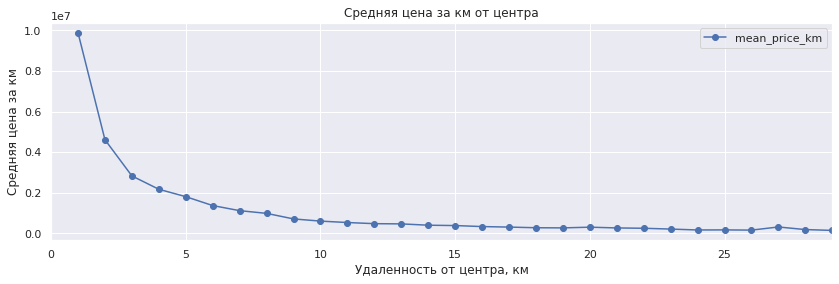

In [148]:
df_spb_mean.plot(style='o-', x='city_centers_nearest_km', y='mean_price_km', figsize=(14,4))

plt.title('Средняя цена за км от центра')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Средняя цена за км')


Судя по графику границу центра мы можем отнести около 7км от центра.

In [149]:
data_spb_center = data_spb.query('city_centers_nearest_km <= 8').copy()
data_spb_not_center = data_spb.query('city_centers_nearest_km > 8').copy()
# создадим срез датафрейма с с квартирами в центре Спб, удаленными не более 8км от центра

In [150]:
data_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_advert,floor_level,price_square_meter,living_total_rate,kitchen_total_rate,year,month,weekday,city_centers_nearest_km,price_km
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,...,173.223058,other_floor,100000.0,0.32,0.41,2018,6,1,8.0,1250000.0
24,8,6500000,97.2,2015-10-31,2,2.7,3,46.5,1,False,...,173.223058,1st_floor,66872.0,0.48,0.20,2015,10,5,2.0,3250000.0
70,9,3400000,30.0,2018-09-05,1,2.7,5,16.0,1,False,...,158.909391,1st_floor,113333.0,0.53,0.23,2018,9,2,8.0,425000.0
94,3,3500000,29.5,2019-04-26,1,2.5,5,15.6,2,False,...,158.909391,other_floor,118644.0,0.53,0.19,2019,4,4,7.0,500000.0
99,32,9600000,90.0,2017-09-26,4,2.7,5,67.0,2,False,...,254.273114,other_floor,106667.0,0.74,0.09,2017,9,1,3.0,3200000.0


In [151]:
data_spb_center['total_area'].mean()
# средняя площадь квартир в центре спб

69.44737994350282

Text(0, 0.5, 'Количество наблюдений')

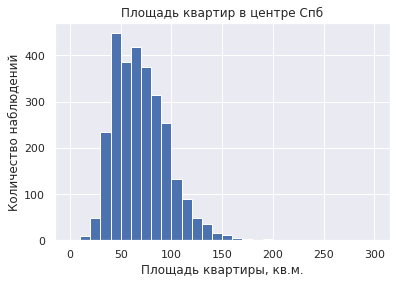

In [152]:
data_spb_center['total_area'].hist(bins=30, range=(0,300))
# гистограмма распространения общей площади квартир в центре Спб
# бОльшая доля лежит в диапазоне от 50м до 100м


plt.title('Площадь квартир в центре Спб')
plt.xlabel('Площадь квартиры, кв.м.')
plt.ylabel('Количество наблюдений')

Text(0, 0.5, 'Количество наблюдений')

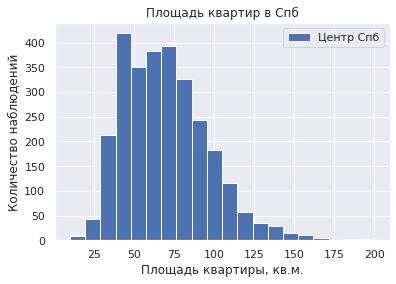

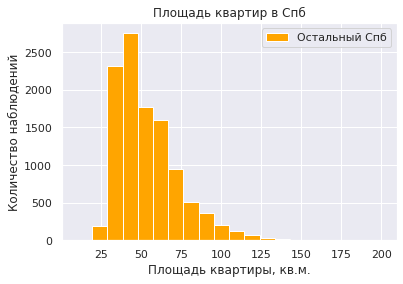

In [153]:
data_spb_center.plot(kind='hist', y='total_area', range=(10,200), \
                     bins=20, legend=True, label='Центр Спб')


plt.title('Площадь квартир в Спб')
plt.xlabel('Площадь квартиры, кв.м.')
plt.ylabel('Количество наблюдений')

data_spb_not_center.plot(kind='hist', y='total_area', range=(10,200), \
                         bins=20, legend=True,  label='Остальный Спб', color='orange')
plt.title('Площадь квартир в Спб')
plt.xlabel('Площадь квартиры, кв.м.')
plt.ylabel('Количество наблюдений')

#### Краткий вывод
 Квартиры в центре Спб отличаются бОльшей площадью по сравнению с остальным Петербургом

Text(0, 0.5, 'Количество наблюдений')

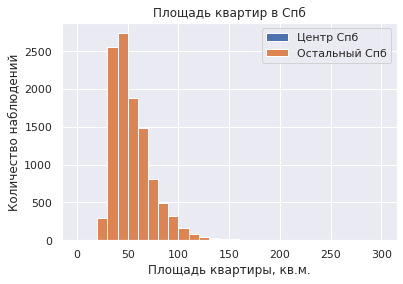

In [154]:
ax = data_spb_center.plot(kind='hist', y='total_area', range=(0,300), \
                          bins=30, legend=True, label='Центр Спб')


data_spb_not_center.plot(kind='hist', y='total_area', ax=ax, \
                         range=(0,300), bins=30, legend=True,  label='Остальный Спб')


plt.title('Площадь квартир в Спб')
plt.xlabel('Площадь квартиры, кв.м.')
plt.ylabel('Количество наблюдений')

In [155]:
data_spb_center['last_price'].mean() # средняя цена за квартиру в центре Спб

8473191.06779661

Text(0, 0.5, 'Кол-во наблюдений')

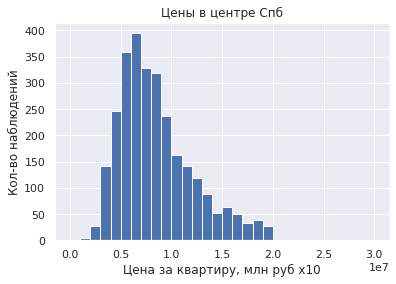

In [156]:
data_spb_center['last_price'].hist(bins=30, range=(0,30000000))

plt.title('Цены в центре Спб')
plt.xlabel('Цена за квартиру, млн руб х10')
plt.ylabel('Кол-во наблюдений')

# в диапазоне до 30млн\кв судя по гистограмме
# большая часть квартир лежит в диапазоне от 5млн до 10.0-12.0 млн руб

Text(0, 0.5, 'Кол-во наблюдений')

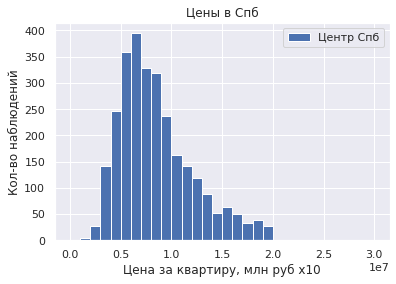

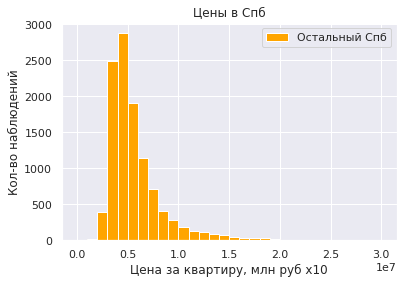

In [157]:
data_spb_center.plot(kind='hist', y='last_price', bins=30, \
                     range=(0,30000000), legend=True, label='Центр Спб')

plt.title('Цены в Спб')
plt.xlabel('Цена за квартиру, млн руб х10')
plt.ylabel('Кол-во наблюдений')

data_spb_not_center.plot(kind='hist', y='last_price', bins=30, \
                         range=(0,30000000), legend=True,  label='Остальный Спб', color='orange')

plt.title('Цены в Спб')
plt.xlabel('Цена за квартиру, млн руб х10')
plt.ylabel('Кол-во наблюдений')

#### Краткий вывод
 Цены в центре Спб дороже, чем в остальном городе

In [158]:
data_spb_center['rooms'].mean() 
# среднее число комнат в квартире в центре Спб, выставленные на продажу

2.3220338983050848

Text(0, 0.5, 'Кол-во наблюдений, шт')

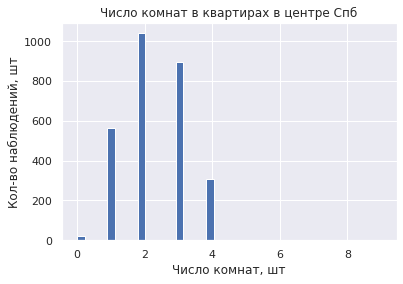

In [159]:
data_spb_center['rooms'].hist(bins=40, range=(0,9))


plt.title('Число комнат в квартирах в центре Спб')
plt.xlabel('Число комнат, шт')
plt.ylabel('Кол-во наблюдений, шт')
# самая распространенные квартиры в центре Спб на продажу - 2 и 3-комнатные

Text(0, 0.5, 'Кол-во наблюдений')

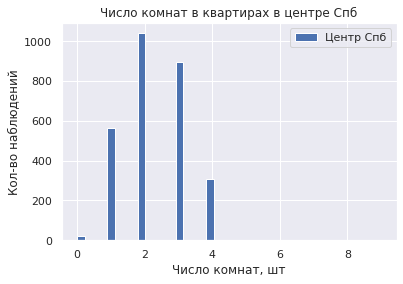

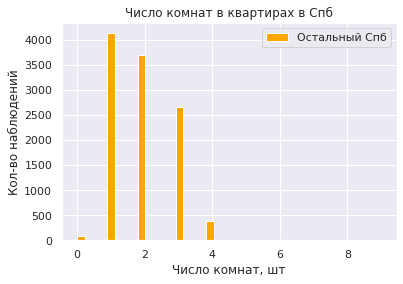

In [160]:
data_spb_center.plot(kind='hist', y='rooms', bins=40, range=(0,9), \
                     legend=True, label='Центр Спб')

plt.title('Число комнат в квартирах в центре Спб')
plt.xlabel('Число комнат, шт')
plt.ylabel('Кол-во наблюдений')

data_spb_not_center.plot(kind='hist', y='rooms', bins=40, \
                         range=(0,9), legend=True,  label='Остальный Спб', color='orange')

plt.title('Число комнат в квартирах в Спб')
plt.xlabel('Число комнат, шт')
plt.ylabel('Кол-во наблюдений')


#### Краткий вывод
 Самые распространенные квартиры вне центра - это 1-комнатные. В центре Спб - это 2 и 3-комнатные

In [161]:
data_spb_center['ceiling_height'].mean()
# средняя высота потолков в квартирах в центре спб

2.8391242937853107

Text(0, 0.5, 'Кол-во наблюдений, шт')

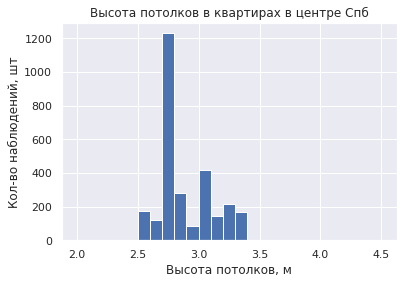

In [162]:
data_spb_center['ceiling_height'].hist(range=(2,4.5), bins=25)

plt.title('Высота потолков в квартирах в центре Спб')
plt.xlabel('Высота потолков, м')
plt.ylabel('Кол-во наблюдений, шт')
# самые распространенные высоты потолка ~ 2.7м и чуть > 3м

Text(0, 0.5, 'Кол-во наблюдений, шт')

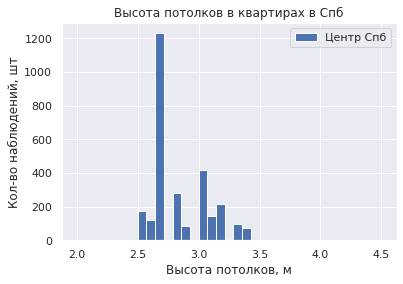

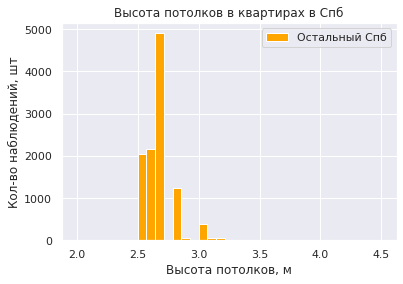

In [163]:
data_spb_center.plot(kind='hist', y='ceiling_height', range=(2,4.5),
                     bins=35, legend=True, label='Центр Спб')

plt.title('Высота потолков в квартирах в Спб')
plt.xlabel('Высота потолков, м')
plt.ylabel('Кол-во наблюдений, шт')

data_spb_not_center.plot(kind='hist', y='ceiling_height', range=(2,4.5), 
                         bins=35, legend=True,  label='Остальный Спб', color='orange')

plt.title('Высота потолков в квартирах в Спб')
plt.xlabel('Высота потолков, м')
plt.ylabel('Кол-во наблюдений, шт')



#### Краткий вывод
 В центре Спб высота потолков несколько выше и часто встречаются высоты более 3м. В остальном городе высот выше 3м практически нет

In [164]:
floor_spb_center = data_spb_center.groupby('floor', as_index=False)['last_price'].agg('median')\
.rename(columns={'floor': 'floor_number', 'last_price' : 'median_price'})
floor_spb_center

,floor_number,median_price
0,1,5900000
1,2,7800000
2,3,7800000
3,4,8000000
4,5,7700000
5,6,8500000
6,7,8670522
7,8,7999999
8,9,7685993
9,10,9490000


Text(0, 0.5, 'Медианная цена, млн руб х10')

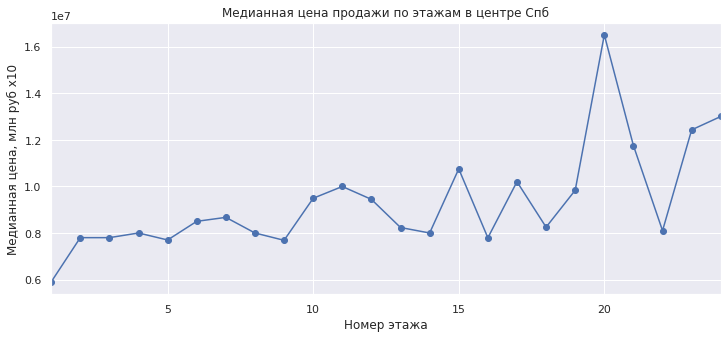

In [165]:
floor_spb_center.plot(x='floor_number', y='median_price', style='o-',
                      figsize=(12,5), legend=False)

plt.title('Медианная цена продажи по этажам в центре Спб')
plt.xlabel('Номер этажа')
plt.ylabel('Медианная цена, млн руб х10')
# изображаем в динамике продажи по этажам

 Заметен в целом рост цены с уровнем этажа,  но не такой прямой и явный

In [166]:
year_spb_center = data_spb_center.groupby('year', as_index=False)['last_price'].agg('median')\
.rename(columns={'year': 'year_number', 'last_price' : 'median_price'})
year_spb_center

,year_number,median_price
0,2014,9100000
1,2015,7475000
2,2016,7799000
3,2017,7500000
4,2018,7755000
5,2019,8000000


Text(0, 0.5, 'Медианная цена, млн руб')

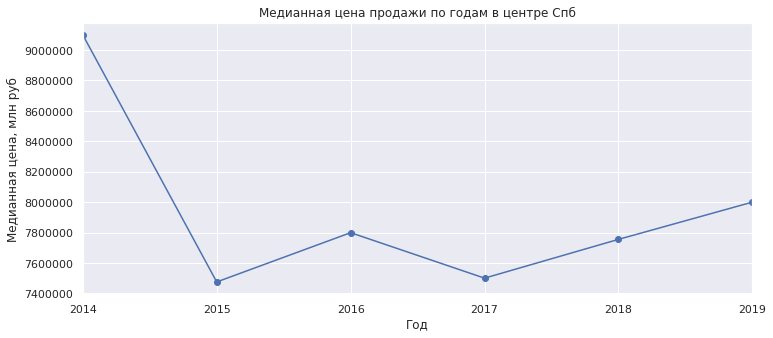

In [167]:
year_spb_center.plot(x='year_number', y='median_price', style='o-', figsize=(12,5), legend=False)

plt.title('Медианная цена продажи по годам в центре Спб')
plt.xlabel('Год')
plt.ylabel('Медианная цена, млн руб')
# изображаем в динамике продажи по этажам

 Цена в центре Спб ведет себя в целом постоянно, то небольшое падение, то небольшой рост. Отмечаем разве что резкое падение цены с 2014 года

In [168]:
month_spb_center = data_spb_center.groupby('month', as_index=False)['last_price'].agg('median')\
.rename(columns={'month': 'month_number', 'last_price' : 'median_price'})
month_spb_center
# группируем по месяцам сумму продаж

,month_number,median_price
0,1,7800000.0
1,2,7600000.0
2,3,7986000.0
3,4,7670000.0
4,5,7400000.0
5,6,7500000.0
6,7,8000000.0
7,8,7675000.0
8,9,8200000.0
9,10,7652996.5


Text(0, 0.5, 'Медианная цена, млн руб')

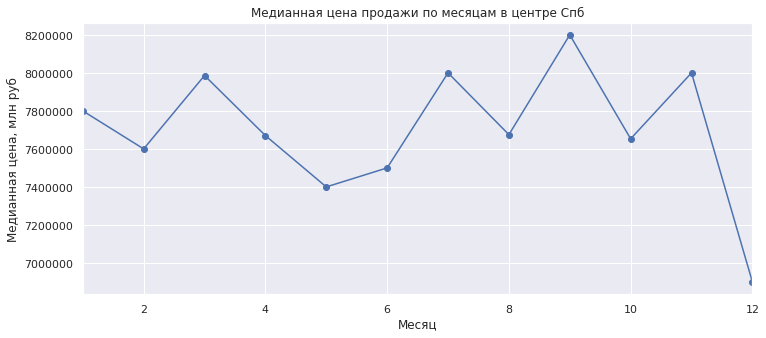

In [169]:
month_spb_center.plot(x='month_number', y='median_price', style='o-',
                      figsize=(12,5), legend=False)

plt.title('Медианная цена продажи по месяцам в центре Спб')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, млн руб')
# изображаем в динамике продажи по этажам

 Летние месяцы и декабрь самые неудачные для продажи - цена на них ниже по сравнению с другими маесяцами. В сентябре самые высокие цены

In [170]:
day_spb_center = data_spb_center.groupby('weekday', as_index=False)['last_price'].agg('median')\
.rename(columns={'weekday': 'weekday_number', 'last_price' : 'median_price'})
day_spb_center
# группируем по дням недели сумму продаж

,weekday_number,median_price
0,0,7725000
1,1,7700000
2,2,7995000
3,3,7500000
4,4,7740000
5,5,7553500
6,6,8050000


Text(0, 0.5, 'Медианная цена, млн руб')

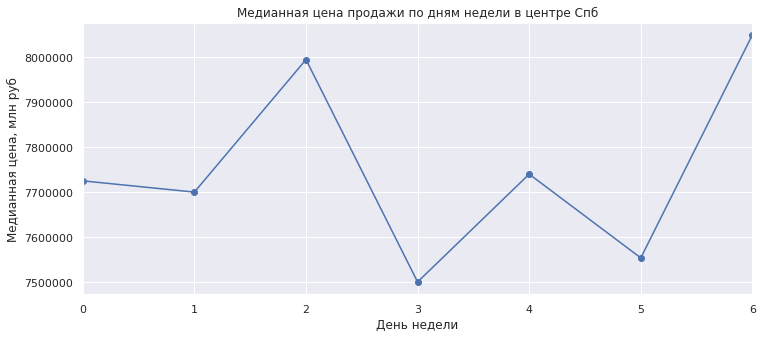

In [171]:
day_spb_center.plot(x='weekday_number', y='median_price', style='o-', 
                    figsize=(12,5), legend=False)

plt.title('Медианная цена продажи по дням недели в центре Спб')
plt.xlabel('День недели')
plt.ylabel('Медианная цена, млн руб')
# изображаем в динамике продажи по этажам

 Самые высокие цены в ср и в вс, минимальные цены в чт

In [172]:
data_spb_center_cut = data_spb_center.loc[:, ['last_price', 'total_area', 'rooms', 'floor', 
                                              'city_centers_nearest_km', 'year', 'month', 
                                              'weekday']].copy()

# срез датафрейма для расчета корреляции 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc50fae49d0>,
      dtype=object)

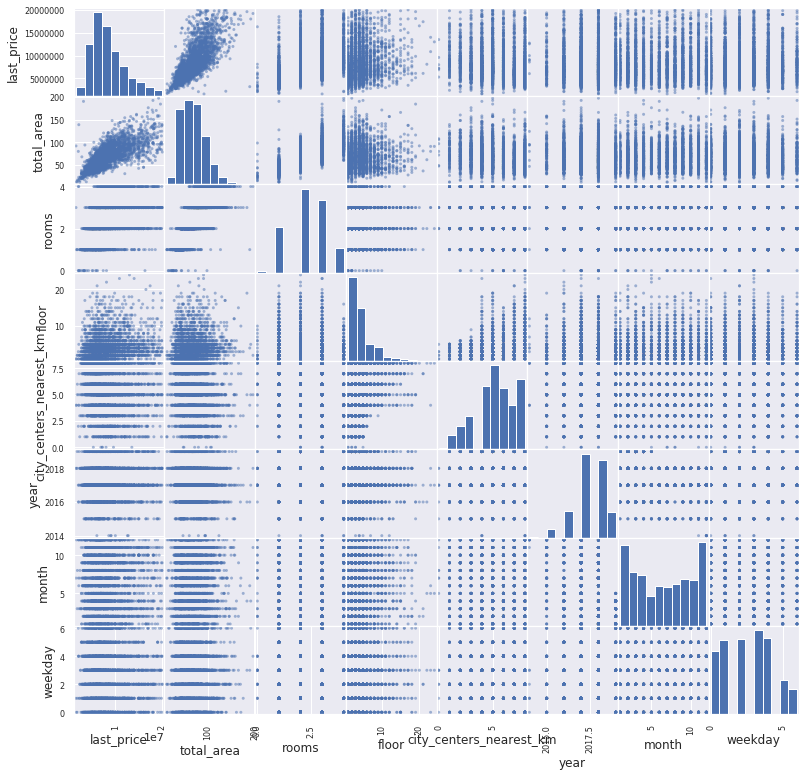

In [173]:
pd.plotting.scatter_matrix(data_spb_center_cut, figsize=(13,13)) #график корреляций

In [174]:
data_spb_center_cut.corr() #расчет корреляции

,last_price,total_area,rooms,floor,city_centers_nearest_km,year,month,weekday
last_price,1.000000,0.735056,0.442701,0.174059,-0.127502,-0.005762,-0.004760,-0.001666
total_area,0.735056,1.000000,0.754112,0.053738,-0.178057,-0.083845,0.014807,-0.010992
rooms,0.442701,0.754112,1.000000,-0.083059,-0.184180,-0.058058,0.016294,-0.027678
floor,0.174059,0.053738,-0.083059,1.000000,0.277467,-0.022547,0.006295,0.031002
city_centers_nearest_km,-0.127502,-0.178057,-0.184180,0.277467,1.000000,0.049617,-0.022065,0.012766
year,-0.005762,-0.083845,-0.058058,-0.022547,0.049617,1.000000,-0.278530,0.011505
month,-0.004760,0.014807,0.016294,0.006295,-0.022065,-0.278530,1.000000,0.047393
weekday,-0.001666,-0.010992,-0.027678,0.031002,0.012766,0.011505,0.047393,1.000000


#### Краткий вывод

1. Усилилась прямая корреляция между ценой и общей площадь квартиры. Коэфф = 0.73
2. Подросла прямая корреляция между числом комнат и ценой. Коэфф = 0.44
3. Возросла прямая корреляция между ценой в центре Спб и уровнем этажа, коэфф = 0.17
4. Есь достаточно заметная обратная корреляция между удаленностью от центра и ценой. Коэфф = -0.13. Это подтверждается графиком средней ценой за кв.м.
5. Связь между датой объявления и ценой не обнаружена

In [175]:
floor_spb = data_spb.groupby('floor', as_index=False)['last_price'].agg('median')\
.rename(columns={'floor': 'floor_number', 'last_price' : 'median_price'})
floor_spb.head()

,floor_number,median_price
0,1,4650000
1,2,5300000
2,3,5450000
3,4,5400000
4,5,4970000


Text(0, 0.5, 'Медианная цена, млн руб х10')

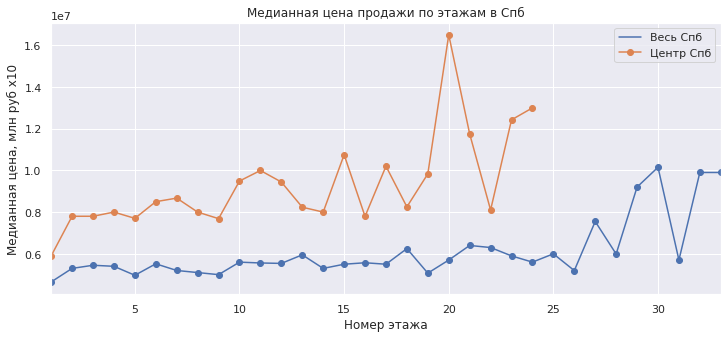

In [176]:
ax = floor_spb.plot(x='floor_number', y='median_price', style='o-', \
                    figsize=(12,5), legend=True, label='Весь Спб')

floor_spb_center.plot(x='floor_number', y='median_price', ax=ax,style='o-', \
                      figsize=(12,5), legend=True, label='Центр Спб')


plt.title('Медианная цена продажи по этажам в Спб')
plt.xlabel('Номер этажа')
plt.ylabel('Медианная цена, млн руб х10')
# изображаем в динамике продажи по этажам

 Есть слабая тенденция к росту цены с ростом этажа квартиры. Отмечаем резкий рост медианной цены на 20 этаже в центре Спб - возможно жилой комплекс премиум класса 

In [177]:
year_spb = data_spb.groupby('year', as_index=False)['last_price'].agg('median')\
.rename(columns={'year': 'year_number', 'last_price' : 'median_price'})
year_spb

,year_number,median_price
0,2014,9100000
1,2015,5411124
2,2016,5100000
3,2017,5050000
4,2018,5300000
5,2019,5618500


Text(0, 0.5, 'Медианная цена, млн руб')

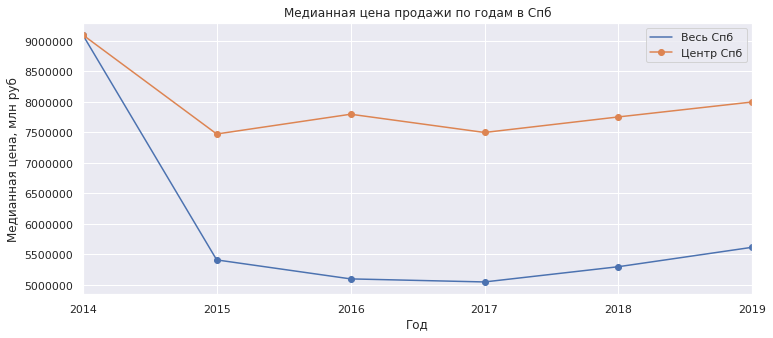

In [178]:
ax = year_spb.plot(x='year_number', y='median_price', style='o-', \
                   figsize=(12,5), legend=True, label='Весь Спб')

year_spb_center.plot(x='year_number', y='median_price', ax=ax, \
                     style='o-', figsize=(12,5), legend=True, label='Центр Спб')


plt.title('Медианная цена продажи по годам в Спб')
plt.xlabel('Год')
plt.ylabel('Медианная цена, млн руб')
# изображаем в динамике продажи по этажам

 После падения с 2014 цены примерно держится на одном уровне и показывают слабый рост с 2017 года и в центре, и в целом по городу Спб

In [179]:
month_spb = data_spb.groupby('month', as_index=False)['last_price'].agg('median')\
.rename(columns={'month': 'month_number', 'last_price' : 'median_price'})
month_spb.head()
# группируем по месяцам сумму продаж

,month_number,median_price
0,1,5350000
1,2,5250000
2,3,5350000
3,4,5350000
4,5,5150000


Text(0, 0.5, 'Медианная цена, млн руб')

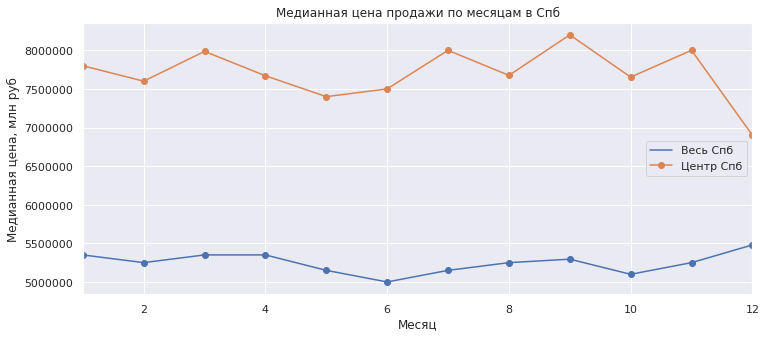

In [180]:
ax = month_spb.plot(x='month_number', y='median_price', style='o-', \
                    figsize=(12,5), legend=True, label='Весь Спб')

month_spb_center.plot(x='month_number', y='median_price', ax=ax, \
                      style='o-', figsize=(12,5), legend=True, label='Центр Спб')


plt.title('Медианная цена продажи по месяцам в Спб')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, млн руб')
# изображаем в динамике продажи по этажам

 Цены проседают летом и в центре, и в целом по городу. К концу года цены в городе растут, а в центре наоборот снижаются

In [181]:
day_spb = data_spb.groupby('weekday', as_index=False)['last_price'].agg('median')\
.rename(columns={'weekday': 'weekday_number', 'last_price' : 'median_price'})
day_spb
# группируем по дням недели сумму продаж

,weekday_number,median_price
0,0,5300000
1,1,5250000
2,2,5234500
3,3,5300000
4,4,5200000
5,5,5207500
6,6,5200000


Text(0, 0.5, 'Медианная цена, млн руб')

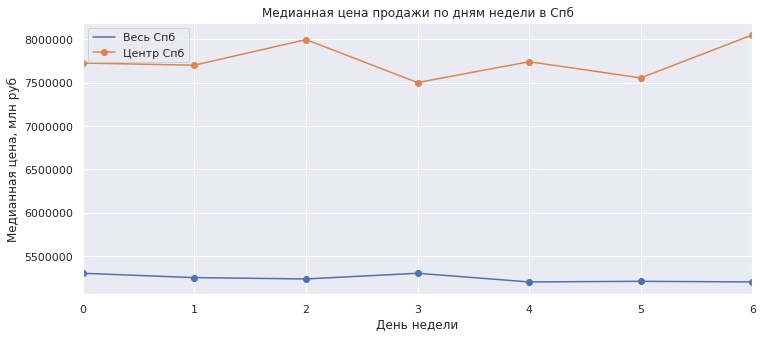

In [182]:
ax = day_spb.plot(x='weekday_number', y='median_price', \
                  style='o-', figsize=(12,5), legend=True, label='Весь Спб')

day_spb_center.plot(x='weekday_number', y='median_price', ax=ax, \
                    style='o-', figsize=(12,5), legend=True, label='Центр Спб')



plt.title('Медианная цена продажи по дням недели в Спб')
plt.xlabel('День недели')
plt.ylabel('Медианная цена, млн руб')
# изображаем в динамике продажи по этажам

 По дням недели примерно цена одинаковая и не показывает резких скачков

In [183]:
data_spb_new = data_spb.loc[:, ['last_price', 'total_area', 
                                'rooms', 'floor', 'city_centers_nearest_km',
                                'year', 'month', 'weekday']].copy()

# срез датафрейма для расчета корреляции

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc50e59cad0>,
      dtype=object)

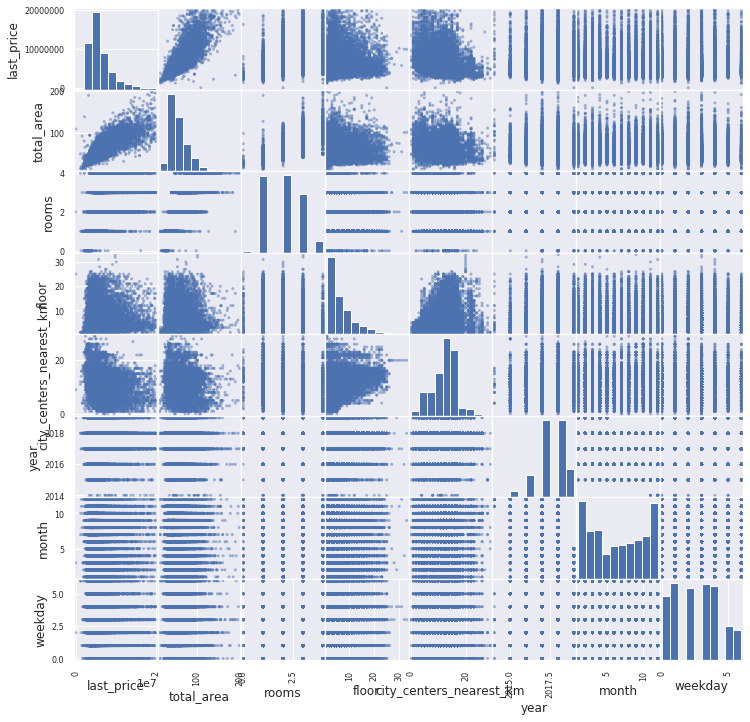

In [184]:
pd.plotting.scatter_matrix(data_spb_new, figsize=(12,12))

In [185]:
data_spb_new.corr()

,last_price,total_area,rooms,floor,city_centers_nearest_km,year,month,weekday
last_price,1.000000,0.821706,0.508058,0.058196,-0.359362,0.021561,0.000033,-0.005069
total_area,0.821706,1.000000,0.765965,-0.007870,-0.241769,-0.053720,0.010953,-0.006288
rooms,0.508058,0.765965,1.000000,-0.160178,-0.175295,-0.027938,0.001503,-0.006672
floor,0.058196,-0.007870,-0.160178,1.000000,0.204572,0.001200,0.005483,0.018937
city_centers_nearest_km,-0.359362,-0.241769,-0.175295,0.204572,1.000000,0.043311,0.006414,-0.006421
year,0.021561,-0.053720,-0.027938,0.001200,0.043311,1.000000,-0.305790,-0.008722
month,0.000033,0.010953,0.001503,0.005483,0.006414,-0.305790,1.000000,0.001187
weekday,-0.005069,-0.006288,-0.006672,0.018937,-0.006421,-0.008722,0.001187,1.000000


#### Краткий вывод

1. Стала очень сильной корреляция между общей площадью и ценой. Коэфф = 0.82
2. Усиилась прямая корреляция между ценой и числом комнат. Коэфф = 0.51
3. Корреляция между уровнем этажа и ценой практически нулевая. Коэфф = 0.06
4. Есть достаточно сильная обратная корреляция между ценой и удаленностью от центра. Коэфф = -0.36
5. Связь между датой публикации и ценой не обнаружена

###  Общий  вывод <a id='6'></a>

##### 1. Есть прямая корреляция между общей площадь квартиры и ценой продажи:

a) в целом по региону коэфф-т корреляции = 0.76

b) в целом по Спб = 0.82

c) по центру Спб = 0.73

В центре Спб площадь немного теряет свой "вес", возможно это связано, что география расположения квартиры главное преимущество таких квартир

##### 2. Есть прямая, но более слабая корреляция между числом комнат и ценой квартиры:
a) в целом по региону коэфф-т корреляции = 0.46

b) в целом по Спб = 0.51

c) по центру Спб = 0.44

Причина потери "веса" те же - география важнее


##### 3. Существует слабая корреляция между этажом квартиры и ее ценой, хотя в историческом центре Спб связь чуть заметнее:
a) в целом по региону коэфф-т корреляции = 0.12

b) в целом по Спб = 0.06

c) по центру Спб = 0.17



##### 4. Есть отрицательная корреляция между удаленность от центра и ценой, которая сильнее заметна в целом по региону и в городе Спб в частности:
a) в целом по региону коэфф-т корреляции = -0.24

b) в целом по Спб = -0.36

c) по центру Спб = -0.13


##### 5. Никакой корреляции между ценой и датами размещения не обнаружено. Коэфф корр везде равен 0.0